In [ ]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving salary_batting_fielding_people_2015.csv to salary_batting_fielding_people_2015.csv


In [ ]:
#Read in csv file for batting, pitching, and fielding stats for the year of 2015
df = pd.read_csv('salary_batting_fielding_people_2015.csv')
df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015OAKabadfe01,2015,2014,OAK,AL,abadfe01,1087500,69,0,0,...,Abad,Fernando Antonio,235,74,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
1,2015CHAabreujo02,2015,2014,CHA,AL,abreujo02,8666000,145,556,80,...,Abreu,Jose Dariel,235,75,R,R,2014-03-31,2021-10-02,abrej003,abreujo02
2,2015SEAackledu01,2015,2014,SEA,AL,ackledu01,2600000,143,502,64,...,Ackley,Dustin Michael,205,73,L,R,2011-06-17,2016-05-29,ackld001,ackledu01
3,2015CLEadamsau01,2015,2014,CLE,AL,adamsau01,507700,6,0,0,...,Adams,Austin David,205,71,R,R,2014-07-12,2019-07-06,adama001,adamsau01
4,2015SFNaffelje01,2015,2014,SFN,NL,affelje01,6000000,62,0,0,...,Affeldt,Jeremy David,225,76,L,L,2002-04-06,2015-10-04,affej001,affelje01


In [ ]:
#Review columns in the datafile
df.columns

Index(['uniqueid', 'yearid', 'battingyearid', 'teamid', 'lgid', 'playerid',
       'salary', 'games', 'bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'rbi', 'stolen_bases', 'caught_stealing', 'walks',
       'strike_outs', 'international_walks', 'hit_by_pitch', 'sacrifice_bunt',
       'sacrifice_flies', 'hit_into_double_plays', 'fielding_position',
       'innouts', 'assists', 'errors', 'double_plays', 'birthyear',
       'birthmonth', 'birthday', 'birthcountry', 'birthstate', 'birthcity',
       'deathyear', 'deathmonth', 'deathday', 'deathcountry', 'deathstate',
       'deathcity', 'namefirst', 'namelast', 'namegiven', 'weight', 'height',
       'bats_hand', 'throws_hand', 'debut', 'finalgame', 'retroid', 'bbrefid'],
      dtype='object')

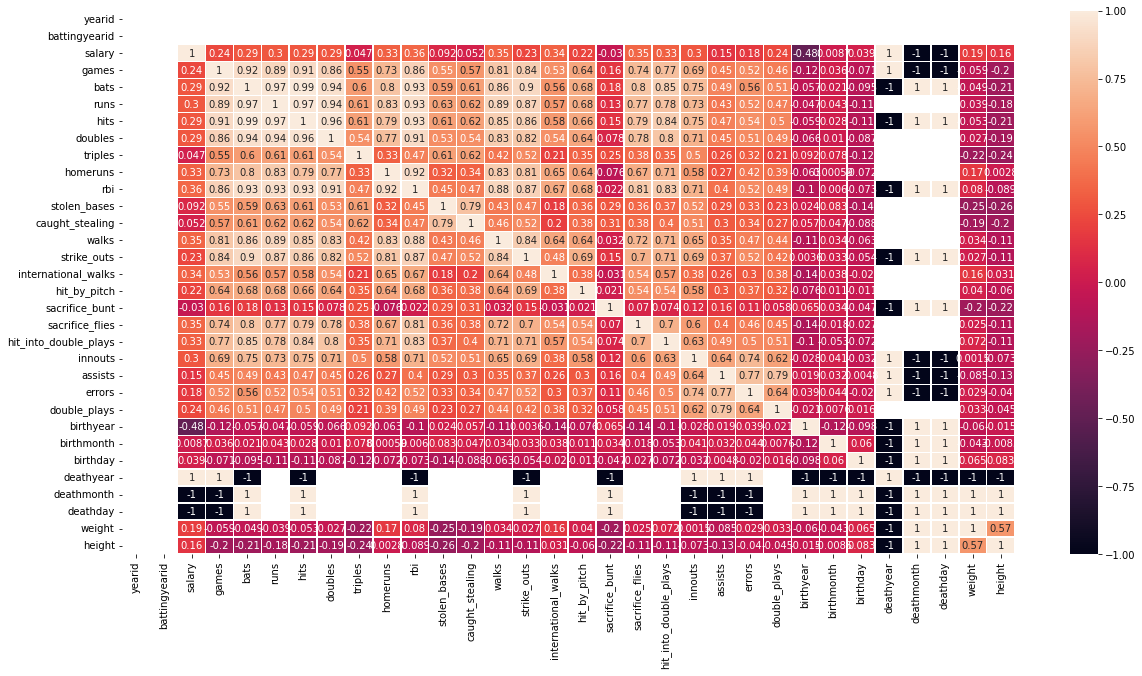

In [ ]:
#Create a correlation heatmap to view the relationships between the paramters
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

In [ ]:
#Removed all players that are pitchers because their salaries are not tied to the same stats as other players
df_no_pitchers = df[df['fielding_position'] != 'P']
df_no_pitchers.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
1,2015CHAabreujo02,2015,2014,CHA,AL,abreujo02,8666000,145,556,80,...,Abreu,Jose Dariel,235,75,R,R,2014-03-31,2021-10-02,abrej003,abreujo02
2,2015SEAackledu01,2015,2014,SEA,AL,ackledu01,2600000,143,502,64,...,Ackley,Dustin Michael,205,73,L,R,2011-06-17,2016-05-29,ackld001,ackledu01
5,2015ARIahmedni01,2015,2014,ARI,NL,ahmedni01,508500,25,70,9,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
6,2015ARIahmedni01,2015,2014,ARI,NL,ahmedni01,508500,25,70,9,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
7,2015CHNalcanar01,2015,2014,CHN,NL,alcanar01,510000,70,278,31,...,Alcantara,Arismendy,170,70,B,R,2014-07-09,2017-08-09,alcaa001,alcanar01


**Descision Tree Regressor**

We decided to try this model because we got an extremely small R-Squared value after using a multiple linear regression model. This model gave us predictions and residuals that we are able to plot and analyze.

In [ ]:
# Split the data into an X matrix and y series
y = df_no_pitchers['salary']
X = df_no_pitchers[['games', 'bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'rbi', 'stolen_bases', 'caught_stealing', 'walks',
       'strike_outs', 'international_walks', 'hit_by_pitch', 'sacrifice_bunt',
       'sacrifice_flies', 'hit_into_double_plays', 'innouts', 'assists', 'errors', 'double_plays','weight', 'height']]

In [ ]:
# Split the data into training and testing sets, initialized the model , fit the model, and make predicitions
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [ ]:
#Create an output dataframe to compare the paramters, the salary, and the predictions
output_df=pd.DataFrame(val_X)
output_df['prediction']=predictions
output_df['ID']=[df['uniqueid'][index] for index in output_df.reset_index()['index']]
output_df['salary']=[df['salary'][index] for index in output_df.reset_index()['index']]
output_df['fielding_position']=[df['fielding_position'][index] for index in output_df.reset_index()['index']]
output_df['namefirst']=[df['namefirst'][index] for index in output_df.reset_index()['index']]
output_df['namelast']=[df['namelast'][index] for index in output_df.reset_index()['index']]
output_df=output_df[['namefirst','namelast','ID','fielding_position','games','bats','runs','rbi', 'hits', 'doubles', 'homeruns', 'walks', 'strike_outs', 'weight','height','salary','prediction']]
output_df

,namefirst,namelast,ID,fielding_position,games,bats,runs,rbi,hits,doubles,homeruns,walks,strike_outs,weight,height,salary,prediction
235,Joe,Mauer,2015MINmauerjo01,1B,120,455,60,55,126,27,4,60,96,225,77,23000000,4166666.0
221,Jonathan,Lucroy,2015MILlucrojo01,C,153,585,73,69,176,53,13,66,71,200,72,3000000,5875000.0
263,Eduardo,Nunez,2015MINnunezed02,2B,72,204,26,24,51,7,4,5,31,195,72,1025000,1025000.0
653,Joe,Panik,2015SFNpanikjo01,2B,73,269,31,18,82,10,1,16,33,205,73,522500,511300.0
321,Ryan,Rua,2015TEXruary01,OF,28,105,11,14,31,7,2,2,18,205,74,508500,508500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Anthony,Recker,2015NYNreckean01,C,58,174,18,27,35,9,7,10,64,240,74,517880,3600000.0
196,Jon,Jay,2015SLNjayjo02,OF,140,413,52,46,125,16,3,28,78,200,71,4125000,1150000.0
447,Miguel,Cabrera,2015DETcabremi01,3B,159,611,101,109,191,52,25,60,117,267,76,22000000,22000000.0
778,Ryan,Zimmerman,2015WASzimmery01,1B,61,214,26,38,60,19,5,22,37,215,75,14000000,14000000.0


In [ ]:
# Calculate difference between salary and predicted salary and sort dataframe
output_df['excess']=output_df['prediction']-output_df['salary']
output_df.sort_values(by='excess')

,namefirst,namelast,ID,fielding_position,games,bats,runs,rbi,hits,doubles,homeruns,walks,strike_outs,weight,height,salary,prediction,excess
122,Prince,Fielder,2015TEXfieldpr01,1B,42,150,19,16,37,8,3,25,24,275,71,24000000,5000000.0,-19000000.0
235,Joe,Mauer,2015MINmauerjo01,1B,120,455,60,55,126,27,4,60,96,225,77,23000000,4166666.0,-18833334.0
206,Ian,Kinsler,2015DETkinslia01,2B,161,684,100,92,188,40,17,29,79,200,72,16000000,2600000.0,-13400000.0
386,Shane,Victorino,2015BOSvictosh01,OF,30,123,14,12,33,6,2,6,21,190,69,13000000,2000000.0,-11000000.0
544,J. J.,Hardy,2015BALhardyjj01,SS,141,529,56,52,142,28,9,29,104,200,73,11500000,538000.0,-10962000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,Juan,Lagares,2015NYNlagarju01,OF,116,416,46,47,117,24,4,20,87,219,74,528696,12000000.0,11471304.0
545,Bryce,Harper,2015WASharpebr03,OF,100,352,41,32,96,10,13,38,104,210,75,2500000,14000000.0,11500000.0
339,Kyle,Seager,2015SEAseageky01,3B,159,590,71,96,158,27,25,52,118,216,72,4500000,17000000.0,12500000.0
666,Salvador,Perez,2015KCAperezsa02,C,150,578,57,70,150,28,17,22,85,255,75,1750000,16000000.0,14250000.0


In [ ]:
#look at players with highest excess values
output_df = output_df.sort_values(by='excess')
output_df.tail(10)

,namefirst,namelast,ID,fielding_position,games,bats,runs,rbi,hits,doubles,homeruns,walks,strike_outs,weight,height,salary,prediction,excess
745,Chris,Taylor,2015SEAtayloch03,SS,47,136,16,9,39,8,0,11,39,196,73,512400,5000000.0,4487600.0
690,Jason,Rogers,2015MILrogerja02,1B,8,9,0,0,1,1,0,1,1,230,73,507500,6500000.0,5992500.0
755,Mike,Trout,2015LAAtroutmi01,OF,157,602,115,111,173,39,36,83,184,235,74,6083000,12500000.0,6417000.0
699,Wilin,Rosario,2015COLrosarwi01,1B,106,382,46,54,102,25,13,23,70,225,71,2800000,14000000.0,11200000.0
700,Wilin,Rosario,2015COLrosarwi01,C,106,382,46,54,102,25,13,23,70,225,71,2800000,14000000.0,11200000.0
586,Juan,Lagares,2015NYNlagarju01,OF,116,416,46,47,117,24,4,20,87,219,74,528696,12000000.0,11471304.0
545,Bryce,Harper,2015WASharpebr03,OF,100,352,41,32,96,10,13,38,104,210,75,2500000,14000000.0,11500000.0
339,Kyle,Seager,2015SEAseageky01,3B,159,590,71,96,158,27,25,52,118,216,72,4500000,17000000.0,12500000.0
666,Salvador,Perez,2015KCAperezsa02,C,150,578,57,70,150,28,17,22,85,255,75,1750000,16000000.0,14250000.0
475,Brandon,Crawford,2015SFNcrawfbr01,SS,153,491,54,69,121,20,10,59,129,223,73,3175000,22000000.0,18825000.0


In [ ]:
#Evaluate the model and outcomes
abs(output_df['excess']).mean()

2507919.0655737706

In [ ]:
#Get absolute error
mean_absolute_error(output_df['salary'], output_df['prediction'])

2507919.0655737706

In [ ]:
#Mean of salary
output_df['salary'].mean()

3693918.5409836066

In [ ]:
#Median of salary
output_df['salary'].median()

1600000.0

**Random Forest**

In [ ]:
# Split data into standard testing and training sets
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.467


In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4672131147540984
